In [5]:
import numpy as np

In [24]:
class SingleLayer:
  def __init__(self,learning_rate=0.1):
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_history=[]
    self.lr=learning_rate

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1.0*err
    return w_grad, b_grad

  def add_bias(self,x):
    return np.c_[np.ones(x.shape[0],1),x]

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def update_val_loss(self,x_val,y_val):
    if x_val is None:
      return
    val_loss =0
    for i in range(len(x_val)):
      z=self.forpass(x_val[i])
      a=self.activation(z)
      a=np.clip(a,1e-10,1-1e-10)
      val_loss+=-(y_val[i]*np.log(a)+(1-y_val[i])*(np.log(1-a)))
    self.val_losses.append(val_loss/len(y_val))

  def fit(self,x,y,epochs=100,x_val=None,y_val=None):
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=y[i]-a
        w_grad,b_grad=self.backprop(x[i],err)
        self.w+=self.lr*w_grad
        self.b+=b_grad
        self.w_history.append(self.w.copy())

        a=np.clip(a,1e-10,1-1e-10)
        loss-=(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val,y_val)
  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
     return (np.mean(self.predict(x)==y))

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [9]:
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.2)
x_train,x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,random_state=42,test_size=0.2)

In [13]:
train_mean=np.mean(x_train,axis=0)
train_std=np.std(x_train,axis=0)
x_train_scaled=(x_train-train_mean)/train_std
x_val_scaled=(x_val-train_mean)/train_std

In [25]:
layer3=SingleLayer()
layer3.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val)
layer3.score(x_val_scaled, y_val)

0.967032967032967

In [21]:
import matplotlib.pyplot as plt

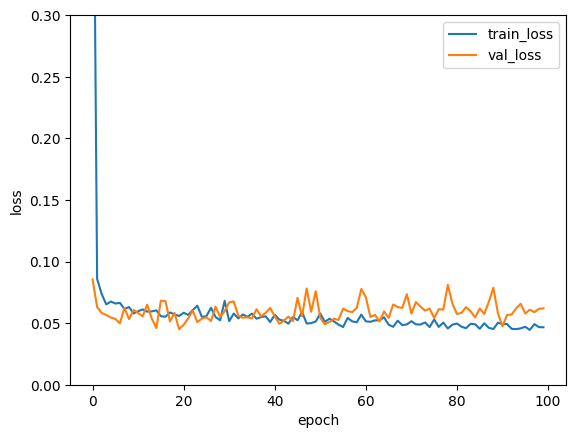

In [23]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [26]:
layer4=SingleLayer()
layer4.fit(x_train_scaled,y_train,epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978